# importar as bibliotecas

In [93]:
import spacy
import pandas
pandas.set_option('display.max_colwidth', None)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# executar as funções

In [135]:
def search_similar(phrase, comments) -> pandas.DataFrame:
	filterdData = []	
	similarities = []
	nlp = spacy.load("pt_core_news_sm")
	corpus_old = (list(comments['content'].values))
	corpus_old.insert(0, phrase) #concatena a phrase na base dados e coloca a phrase no inicio
    
	for i in corpus_old:
		filterdData.append(clear_phrase(i, nlp, ['PROPN', 'ADJ', 'NOUN', 'VERB'])) #fazendo uma limpeza nos comentários, deixando apenas Pronomes pessoais, adjetivos, substantivos e verbos 

	processedData = TfidfVectorizer().fit_transform(filterdData) #transformo a base de dados em vetores de números TF-IDF
	print(corpus_old[0])
	[lenght, M] = processedData.shape #pego o tamanho da base de dados    
	for i in range(1, lenght):
		s = cosine_similarity(processedData[0],processedData[i]) #o comentário processedData[0] é a frase digitada pelo usuário, daí preciso computar a distancia dessa frase com todos os comentários da base de dados
		similarities.append(s)
	comments['similaridade'] = similarities
    
	return comments
	
def clear_phrase(doc, nlp, pos_tag):
	if(type(doc) != spacy.tokens.doc.Doc):
		doc = nlp(doc)
	new_phrase = ' '.join([str(t.lemma_) for t in doc if t.pos_ in pos_tag])
	return new_phrase

def add_hours(minDate:str,maxDate:str)-> (str,str):
	minDate = minDate + "00:00:00"
	maxDate = maxDate + "23:59:59"

	return minDate,maxDate
def get_comments(originPath:str,minDate:str = None,maxDate:str = None,versions = None) -> pandas.DataFrame:
	
	commentsFile = pandas.read_csv(originPath)

	if minDate != None and maxDate != None:
		minDate,maxDate = add_hours(minDate,maxDate)

	for i in range(0, len(commentsFile)):
		if commentsFile['date'][i] < minDate or commentsFile['date'][i] > maxDate or commentsFile['version'][i] not in versions:
			#print("droped",commentsFile['version'][i])
			commentsFile = commentsFile.drop([i])
	return commentsFile

def sort_by_thumbs(file:pandas.DataFrame) -> pandas.DataFrame:
	file = file.sort_values(by=['thumbs'])
	return file

def limpar_comentarios(df, pos_tag):
    nlp = spacy.load("pt_core_news_sm")
    lista = []
    for i in df['content']:
        r = clear_phrase(i, nlp, pos_tag) #deixando os comentários apenas com pos_tag
        lista.append(r) 
    df['comentarios_limpos'] = lista
    return df

def extrair_ngrams(corpus, AA, BB):
    c_vec = CountVectorizer(ngram_range=(AA,BB))
    ngrams = c_vec.fit_transform(corpus)
    count_values = ngrams.toarray().sum(axis=0)
    vocab = c_vec.vocabulary_
    df_ngram = pandas.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
    
    return df_ngram

def plotar_frequencias(variavel, df):
    copy_df = df[[variavel]].copy()
    copy_df.groupby(new[variavel].dt.date).count().plot(kind="bar")



# coletar os comentários

In [5]:
database = get_comments("./General_Data.csv","2021-09-01","2021-10-01","3.0.0")

# buscar por comentários similares

In [100]:
similarities_list = search_similar('facial', database)
d = similarities_list.sort_values('similaridade', ascending=False)

facial


In [101]:
d2 = d[d['similaridade'] >= 0.3] #exibindo apenas os comentários com similaridade >= 0.3
d2

,Unnamed: 0,date,content,score,version,thumbs,similaridade
201,50,2021-09-27 14:50:43,muito complicada esse reconhecimento facial.,2,3.0.0,0,[[0.5160365864897699]]
481,152,2021-09-22 09:50:01,Reconhecimento Facial não está funcionando 😕,3,3.0.0,0,[[0.5140236923824919]]
428,98,2021-09-25 18:04:40,não funciona o reconhecimento facial,3,3.0.0,0,[[0.5140236923824919]]
358,23,2021-09-30 13:13:28,O reconhecimento facial não funciona,3,3.0.0,0,[[0.5140236923824919]]
41,57,2021-10-01 19:50:46,Difícil cadastro facial 👎,1,3.0.0,0,[[0.5126396711706483]]
512,184,2021-09-19 16:02:35,muita dificuldade com o reconhecimento facial,3,3.0.0,0,[[0.48198804513279103]]
500,171,2021-09-20 21:50:53,reconhecimento facial não me reconhece,3,3.0.0,0,[[0.46040372419197745]]
496,167,2021-09-21 09:51:45,difícil o reconhecimento facial tem que melhorar,3,3.0.0,0,[[0.4235058323362484]]
89,120,2021-10-01 08:59:35,não gostei de ter que usar reconhecimento facial,1,3.0.0,0,[[0.41690194941412295]]
198,47,2021-09-28 08:18:20,o reconhecimento facial é muito falho...,2,3.0.0,0,[[0.4118155867430011]]


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


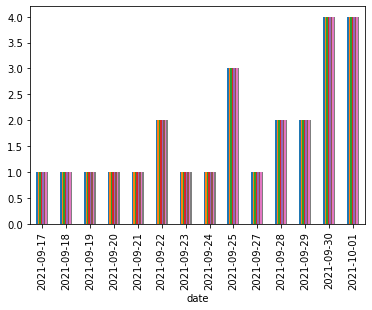

In [126]:
d2["date"] = d2["date"].astype("datetime64")
d2.groupby(d2['date'].dt.date).count().plot(kind="bar", legend=None)

In [141]:
d3 = limpar_comentarios(d2, ['VERB', 'NOUN'])
print(d3['comentarios_limpos'])

201                        complicar reconhecimento
481                                       funcionar
428                        funcionar reconhecimento
358                        reconhecimento funcionar
41                                      cadastrar 👎
512                      dificuldade reconhecimento
500                       reconhecimento reconhecer
496                         reconhecimento melhorar
89                       gostar usar reconhecimento
198                                  reconhecimento
453                                  reconhecimento
569                                  reconhecimento
155         Horrível conseguir fazer reconhecimento
377                          Acertar reconhecimento
212                        algoritmo reconhecimento
556                     reconhecimento falhar vezar
519                            identificação triste
74     conseguir abrir app reconhecimento funcionar
573          ter dificuldade validar reconhecimento
469         

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [143]:
n = extrair_ngrams(d3['comentarios_limpos'], 2, 3)
print(n)

    frequency                      bigram/trigram
0           3                fazer reconhecimento
1           2            reconhecimento funcionar
2           1              validar reconhecimento
3           1                 usar reconhecimento
4           1      trabalhar fazer reconhecimento
5           1                     trabalhar fazer
6           1                 ter fazer tentativo
7           1                           ter fazer
8           1             ter dificuldade validar
9           1                     ter dificuldade
10          1            reconhecimento ter fazer
11          1                  reconhecimento ter
12          1           reconhecimento reconhecer
13          1             reconhecimento melhorar
14          1         reconhecimento falhar vezar
15          1               reconhecimento falhar
16          1            reconhecimento conseguir
17          1     partir reconhecimento conseguir
18          1               partir reconhecimento
